In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
url = '/content/drive/MyDrive/datasets/homeprices_banglore.csv'

import pandas as pd
df = pd.read_csv(url)

In [3]:
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [5]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price', axis=1))
scaled_X[0:5]

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ]])

In [7]:
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0], 1))
scaled_y[0:5]

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074]])

In [13]:
import numpy as np

In [64]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):

  numbers_of_features = X.shape[1]

  w = np.ones(shape=(numbers_of_features))
  b = 0
  total_samples = X.shape[0]

  cost_list = []
  epoch_list = []

  for i in range(epochs):

    y_predicted = np.dot(w, scaled_X.T) + b

    w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
    b_grad = -(2/total_samples)*(np.sum(y_true-y_predicted))

    w = w - learning_rate * w_grad
    b = b - learning_rate * b_grad

    cost = np.mean(np.square(y_true-y_predicted)) # mse

    if i%10==0:
      cost_list.append(cost)
      epoch_list.append(i)

  return w, b, cost, cost_list, epoch_list

In [65]:
w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0],),500)
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

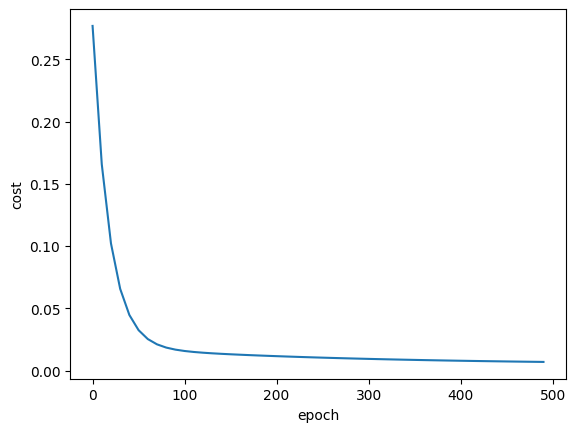

In [66]:
import matplotlib.pyplot as plt
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list, cost_list)

In [70]:
def predict(area, bedrooms, w, b):
  scaled_X = sx.transform([[area, bedrooms]])[0]

  scaled_price = w[0]*scaled_X[0] + w[1]*scaled_X[1] + b
  return sy.inverse_transform([[scaled_price]])[0][0]



predict(2600, 4, w, b)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596

In [71]:
predict(1000, 2, w, b)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


30.253094462442355

In [98]:
import random

def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
  numbers_of_features = X.shape[1]

  w = np.ones(shape=(numbers_of_features))
  b = 0
  total_samples = X.shape[0]

  cost_list = []
  epoch_list = []

  for i in range(epochs):
    random_index = random.randint(0, total_samples-1)
    sample_x = X[random_index]
    sample_y = y_true[random_index]
    y_predicted = np.dot(w, sample_x.T) + b

    w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
    b_grad = -(2/total_samples)*(sample_y-y_predicted)

    w = w - learning_rate * w_grad
    b = b - learning_rate * b_grad

    cost = np.square(sample_y-y_predicted)

    if i%100==0:
      cost_list.append(cost)
      epoch_list.append(i)

  return w, b, cost, cost_list, epoch_list

In [78]:
w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

(array([0.70957168, 0.67714692]), -0.23089697958839656, 0.006763505726842909)

In [79]:
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

In [119]:
cost_list_sgd[0:5]

[0.09316918098351136,
 0.06394101563833282,
 0.03219526082013838,
 0.09605619309194224,
 0.162368593987347]

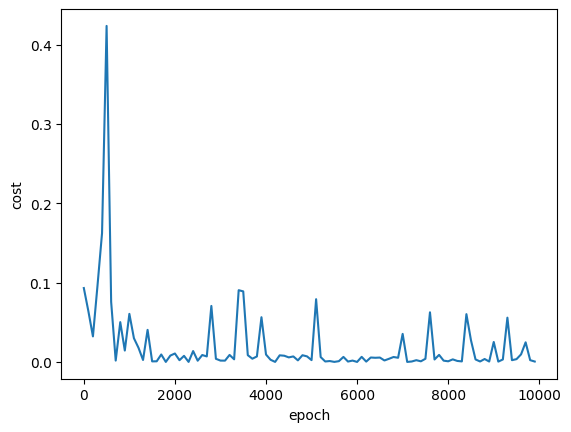

In [80]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd, cost_list_sgd)

In [82]:
predict(2600, 4, w_sgd, b_sgd)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.8472474994336

In [124]:
def mini_batch_gradient_descent(X, y_true, epochs = 100, batch_size = 5, learning_rate = 0.01):

    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0] # number of rows in X

    if batch_size > total_samples: # In this case mini batch becomes same as batch gradient descent
        batch_size = total_samples

    cost_list = []
    epoch_list = []

    num_batches = int(total_samples/batch_size)

    for i in range(epochs):
        random_indices = np.random.permutation(total_samples)
        X_tmp = X[random_indices]
        y_tmp = y_true[random_indices]

        for j in range(0,total_samples,batch_size):
            Xj = X_tmp[j:j+batch_size]
            yj = y_tmp[j:j+batch_size]
            y_predicted = np.dot(w, Xj.T) + b

            w_grad = -(2/len(Xj))*(Xj.T.dot(yj-y_predicted))
            b_grad = -(2/len(Xj))*np.sum(yj-y_predicted)

            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad

            cost = np.mean(np.square(yj-y_predicted)) # MSE (Mean Squared Error)

        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = mini_batch_gradient_descent(
    scaled_X,
    scaled_y.reshape(scaled_y.shape[0],),
    epochs = 120,
    batch_size = 5
)
w, b, cost

(array([0.7101141 , 0.67816548]), -0.23340482423187744, 0.0019207541483544533)

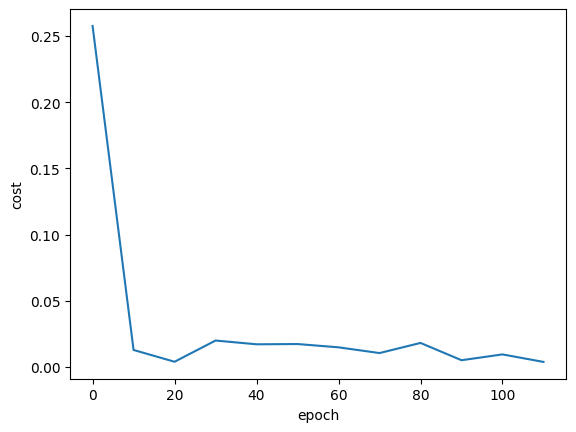

In [126]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [127]:
total_samples = 100
random_indices = np.random.permutation(total_samples)
print(random_indices)

[38 82 66 47 21 92 32 48  6 45  2 11 30  8 13 18 71 55  7 91 78 95 44 15
 61 76  5 73 50 27 36 10 31 39  4 75 81 69 20  9 14 42 17 34 57 68 58 64
 85 22 94 19 89 63 16 28 62 53 72 40 52  3 29 24 33 96 26 67 90 60 98 25
 54 79 12  0 99 59 65 46 84 74 77 88 80 35 41 87 23  1 83 49 43 97 70 86
 93 37 56 51]
